# PCA Results Visualization

To run it data should be saved in one folder:
- principal_components.csv - *output of PCA*
- sensor_description.csv - *attribute sdf from class DieselDs from script jems_data.py* 
- components.npy - *attribute of PCA*
- explained_variance_ratio.npy - *attribute of PCA*

[PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Visualization:
    def __init__(self, data_location):
        self.data_location = data_location
        
        # load data
        self.principal_components = pd.read_csv(self.data_location + "principal_components.csv", index_col=0)
        self.sensor_description = pd.read_csv(self.data_location + "sensor_description.csv", index_col=1)
        self.components = np.load(self.data_location + "components.npy")
        self.explained_variance_ratio = np.load(self.data_location + "explained_variance_ratio.npy")
    
    def draw_variance(self):
        """
        Draw variance for each principal component and cumulative variance
        """
        plt.figure(figsize=(30, 20))
        plt.subplot(211)
        plt.plot(np.arange(1, len(self.explained_variance_ratio)+1), np.cumsum(self.explained_variance_ratio))
        plt.subplot(212)
        plt.bar(np.arange(1, len(self.explained_variance_ratio)+1), self.explained_variance_ratio)
        plt.show()
        
    def draw_matrix(self, num_of_components=10, threshold=0.2, save=False):
        """
        Draw matrix where each column represents one sensor and each row one principal components.
        Only first num_of_components principal components and only sensors which affect more
        than threshold on any component are shown.
        """
        compdf = pd.DataFrame(data=self.components[:num_of_components], columns=self.principal_components.columns)
        
        # select sensors with at least some information
        to_drop = []
        for i in compdf.columns:
            if(compdf[i].abs().lt(threshold).all()):
                to_drop.append(i)
        compdf = compdf.drop(columns=to_drop)

        # prepare sensor descriptions
        descriptions = ["{} ({})".format(self.sensor_description.loc[int(i), "description"],
                                         self.sensor_description.loc[int(i), "name"])
                        for i in compdf.columns]

        # draw matrix
        plt.figure(1, figsize=(0.5*len(compdf.columns)+2, 0.5*compdf.shape[0]+5))
        plt.matshow(compdf.values, fignum=1)
        plt.colorbar()
        plt.xticks(range(len(compdf.columns)),descriptions,rotation=65,ha='left')
        
        if(save):
            plt.savefig(DATA_LOCATION + "matrix.png", format="png")
        else:
            plt.show()


## Variance

Cumulative variance and variance for each principal component

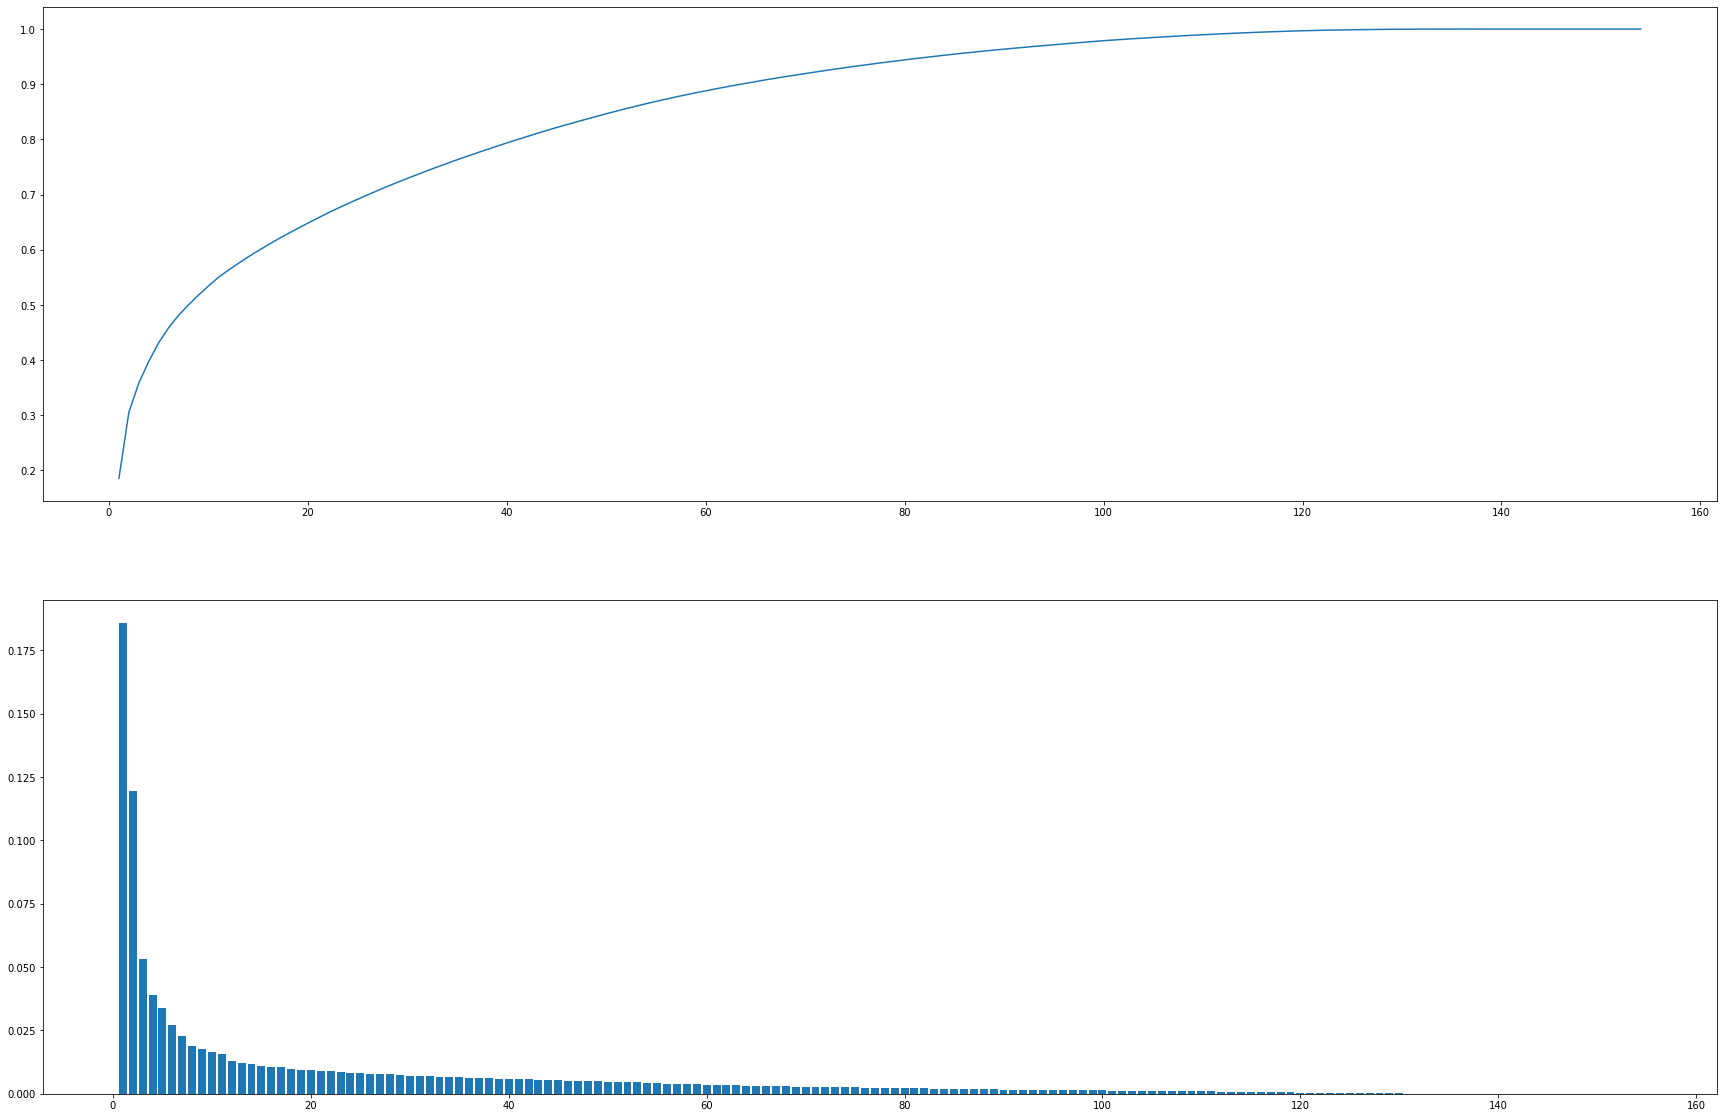

In [3]:
vis = Visualization("results2016/")
vis.draw_variance()

## Sensor contribution to principal components

Matrix of sensors that the most contribute to principal components.

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


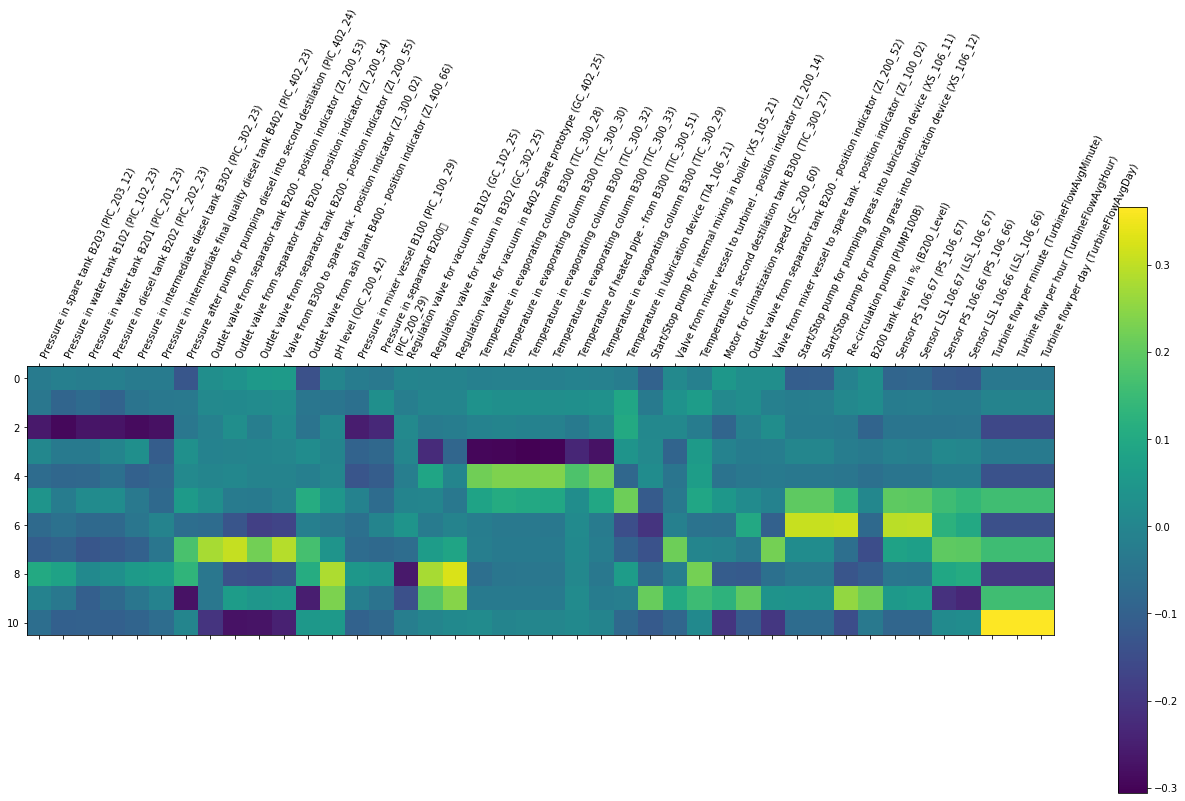

In [4]:
vis.draw_matrix(11, 0.2)